# Moore-Penrose pseudo inverse


In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from time import time

In [3]:
def time_elapsed(func):
    def wrapper(*args, **kwargs):
        start = time()
        result = func(*args, **kwargs)
        end = time()
        print(f"Time elapsed: {end - start:.4f} s")
        return result
    return wrapper

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.


In [4]:
@time_elapsed
def my_pinv_fullSVD(A):
    U,S,Vt = np.linalg.svd(A,full_matrices=True)
    S[S > 0] = 1/S[S > 0]
    return Vt.T @ la.diagsvd(S, A.shape[1], A.shape[0]) @ U.T

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.


In [5]:
@time_elapsed
def my_pinv_thinSVD(A):
    U,S,Vt = np.linalg.svd(A,full_matrices=False)
    S_pinv = np.diag([1/s if s > 0 else 0 for s in S])

    return Vt.T @ S_pinv @ U.T

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).


In [6]:
A = np.random.randn(5, 4)

A_inv = np.linalg.pinv(A)
A_inv_full = my_pinv_fullSVD(A)
A_inv_thin = my_pinv_thinSVD(A)

print(np.linalg.norm(A_inv - A_inv_full))
print(np.linalg.norm(A_inv - A_inv_thin))
print(np.allclose(A_inv_full, np.linalg.pinv(A)))

Time elapsed: 0.0010 s
Time elapsed: 0.0000 s
2.8356229505730675e-16
2.8356229505730675e-16
True


Compare the three implementations performances through the Google Colab magic command `%timeit`.


In [7]:
%timeit np.linalg.pinv(A)

30.4 μs ± 1.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%timeit my_pinv_fullSVD(A)

Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapse

In [9]:
%timeit my_pinv_thinSVD(A)

Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapsed: 0.0000 s
Time elapse

# Least-square regression


Consider the linear model

$$
y = mx + q.
$$

where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.


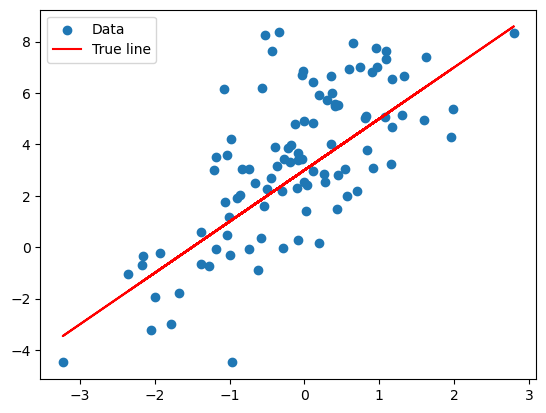

In [10]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m * X + q + noise * np.random.randn(N)

plt.scatter(X,Y,label='Data')
plt.plot(X, m*X + q, 'r',label='True line')
plt.legend()

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem

$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$

and display the regression line superimposed to the noisy data and the exact model.


In [11]:
Phi = np.hstack((X[:,None], np.ones((N,1))))
w = my_pinv_thinSVD(Phi) @ Y

print("predicted m:", w[0])
print("predicted q:", w[1])

Time elapsed: 0.0109 s
predicted m: 2.008760091329279
predicted q: 3.565459299600543


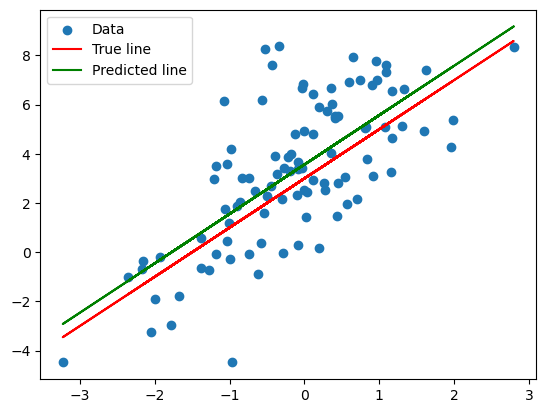

In [12]:
plt.scatter(X,Y,label='Data')
plt.plot(X, m*X + q, 'r',label='True line')
plt.plot(X, X*w[0] + w[1], 'g',label='Predicted line')
plt.legend()

Repeat the excercise by solving the normal equations. Compare the results


In [13]:
w2 = np.linalg.solve(Phi.T @ Phi, Phi.T @ Y)

print(np.linalg.norm(w - w2))

3.2023728339893768e-15


# Ridge regression and Kernel regression


Consider the function

$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.


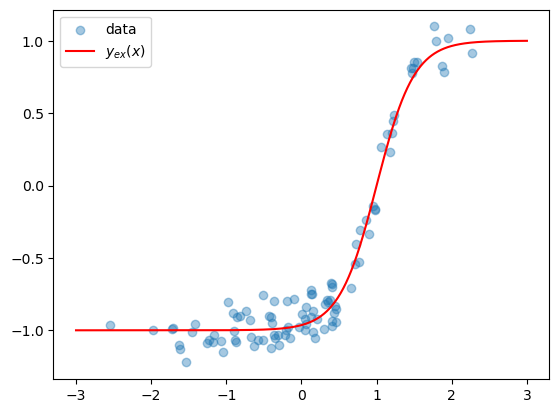

In [23]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2 * (x - 1))

np.random.seed(0)
X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3, 3, N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X, Y, marker="o", label="data", alpha=0.4)
plt.plot(X_test, Y_test_ex, color="red", label="$y_{ex}(x)$")
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.


In [33]:
Phi = np.hstack([X[:, None], np.ones((N, 1))])
w_ls = np.linalg.pinv(Phi) @ Y

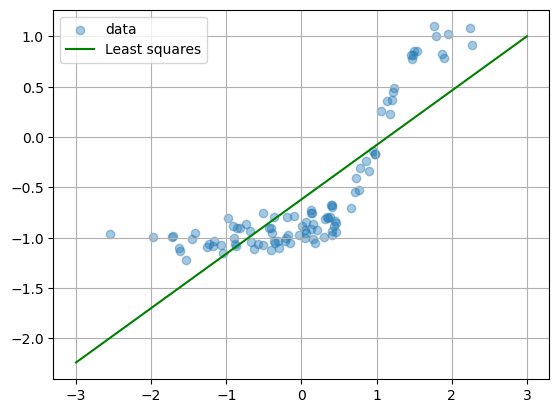

In [36]:
Y_pred_ls = X_test * w_ls[0]+w_ls[1]

plt.scatter(X, Y, marker="o", label="data", alpha=0.4)
plt.plot(X_test, Y_pred_ls, color="green", label="Least squares")
plt.legend()
plt.grid()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.


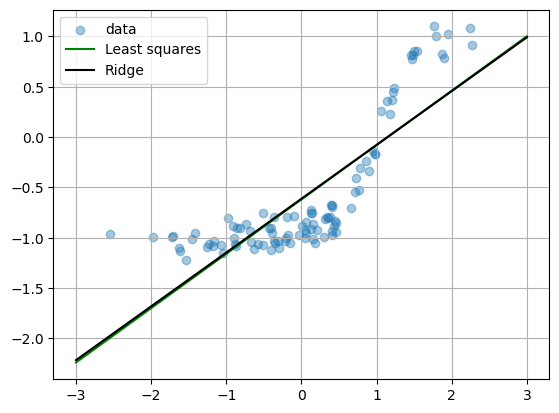

In [38]:
lam = 1.0 # regularization parameter

alpha = np.linalg.solve(Phi @ Phi.T + lam * np.eye(N), Y)
w_ridge = Phi.T @ alpha

Phi_test = np.hstack((X_test[:,None], np.ones((N_test,1))))
Y_pred_ridge = Phi_test @ w_ridge

plt.scatter(X, Y, marker="o", label="data", alpha=0.4)
plt.plot(X_test,Y_pred_ls, color="green", label="Least squares")
plt.plot(X_test,Y_pred_ridge, color="black", label="Ridge")
plt.legend()
plt.grid()

Consider now **kernel regression**.

1. Consider first the scalar product kernel
   $$K(x_i,x_j) = x_i x_j + 1.$$
   Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
   $$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
   $$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$


In [41]:
lam = 1.0

def kernel(xi, xj):
    return (xi*xj + 1)**4

K = np.array([[kernel(X[i],X[j]) for i in range(N)] for j in range(N)])

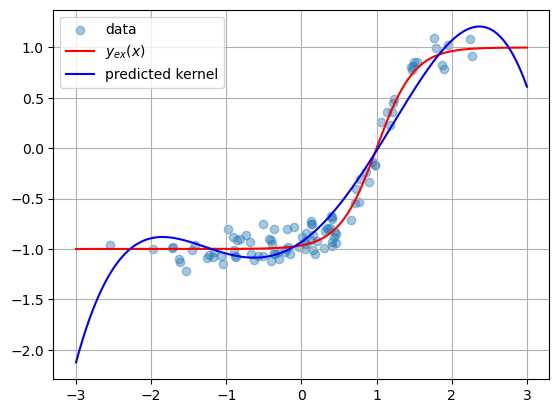

In [42]:
alpha = np.linalg.solve(K + lam * np.eye(N), Y)

K_test = np.array([[kernel(X[i],X_test[j]) for i in range(N)] for j in range(N_test)])
Y_pred_kernel = K_test @ alpha

plt.scatter(X, Y, marker="o", label="data", alpha=0.4)
plt.plot(X_test, Y_test_ex, color="red", label="$y_{ex}(x)$")
plt.plot(X_test,Y_pred_kernel, color="blue", label="predicted kernel")
plt.legend()
plt.grid()

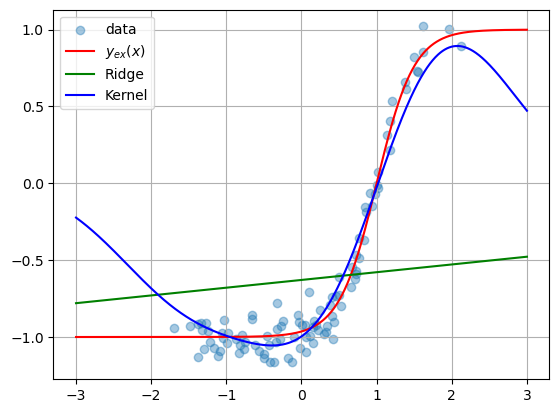

In [18]:
lam = 1.0
sigma = 1.0

def gaussian_kernel(xi,xj):
    return np.exp(-np.abs(xi - xj)**2/(2*sigma**2))

K = np.array([[gaussian_kernel(X[i],X[j]) for i in range(N)] for j in range(N)])

alpha = np.linalg.solve(K + lam * np.eye(N), Y)

K_test = np.array([[gaussian_kernel(X[i],X_test[j]) for i in range(N)] for j in range(N_test)])
Y_pred_kernel = K_test @ alpha

plt.scatter(X, Y, marker="o", label="data", alpha=0.4)
plt.plot(X_test, Y_test_ex, color="red", label="$y_{ex}(x)$")
plt.plot(X_test,Y_pred, color="green", label="Ridge")
plt.plot(X_test,Y_pred_kernel, color="blue", label="Kernel")
plt.legend()
plt.grid()